#Optimisation of Travel Routes

 Name-Rohit Kumar

 Roll Number 23M1502




The Dantzig–Fulkerson–Johnson formulation for the symmetric traveling salesman problem is the following:

\begin{equation}
\min_{e \in E} \sum_{e \in E} c_e x_e
\end{equation}

subject to:

\begin{align}
\sum_{e \in \delta(i)} x_e &= 2 \quad \text{for } i \in V \\
\sum_{e \in \delta(S)} x_e &\geq 2 \quad \text{for } \emptyset \subset S \subset V \\
x_e &\in \{0, 1\} \quad \text{for } e \in E
\end{align}

Explaination of DFJ Formulation for TSP:-

The Dantzig-Fulkerson-Johnson (DFJ) formulation for the Traveling Salesman Problem (TSP) aims to minimize the total distance traveled by a salesman visiting each city exactly once and returning to the starting city.

Decision Variables:-
The DFJ formulation involves binary decision variables $x_{ij}$, where $x_{ij} = 1$ if the salesman travels directly from city $i$ to city $j$, and $x_{ij} = 0$ otherwise.

Objective Function:-
The objective function minimizes the total distance traveled, represented as the sum of distances over all pairs of adjacent cities visited in the tour.

The constraints ensure: Each city is visited exactly once and each city left exactly one: $\sum_{j} x_{ij} = 2$ for each city $i$.

Subtour Elimination: Additional constraints are imposed to prevent the formation of subtours, ensuring the salesman's path forms a single tour.

By incorporating these constraints, the DFJ formulation guarantees feasible tours that meet the requirements of the TSP.





In [ ]:
import numpy as np
!pip -q install pyomo
from pyomo.environ import *
!apt-get install -y -qq glpk-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.7 MB/s eta 0:00:00
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected pac

#**Question 1.2**

In [ ]:
import itertools

subsets = [list(subset) for subset_length in range(2, 6) for subset in itertools.combinations(range(7), subset_length)]
subsets

[[0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [0, 5],
 [0, 6],
 [1, 2],
 [1, 3],
 [1, 4],
 [1, 5],
 [1, 6],
 [2, 3],
 [2, 4],
 [2, 5],
 [2, 6],
 [3, 4],
 [3, 5],
 [3, 6],
 [4, 5],
 [4, 6],
 [5, 6],
 [0, 1, 2],
 [0, 1, 3],
 [0, 1, 4],
 [0, 1, 5],
 [0, 1, 6],
 [0, 2, 3],
 [0, 2, 4],
 [0, 2, 5],
 [0, 2, 6],
 [0, 3, 4],
 [0, 3, 5],
 [0, 3, 6],
 [0, 4, 5],
 [0, 4, 6],
 [0, 5, 6],
 [1, 2, 3],
 [1, 2, 4],
 [1, 2, 5],
 [1, 2, 6],
 [1, 3, 4],
 [1, 3, 5],
 [1, 3, 6],
 [1, 4, 5],
 [1, 4, 6],
 [1, 5, 6],
 [2, 3, 4],
 [2, 3, 5],
 [2, 3, 6],
 [2, 4, 5],
 [2, 4, 6],
 [2, 5, 6],
 [3, 4, 5],
 [3, 4, 6],
 [3, 5, 6],
 [4, 5, 6],
 [0, 1, 2, 3],
 [0, 1, 2, 4],
 [0, 1, 2, 5],
 [0, 1, 2, 6],
 [0, 1, 3, 4],
 [0, 1, 3, 5],
 [0, 1, 3, 6],
 [0, 1, 4, 5],
 [0, 1, 4, 6],
 [0, 1, 5, 6],
 [0, 2, 3, 4],
 [0, 2, 3, 5],
 [0, 2, 3, 6],
 [0, 2, 4, 5],
 [0, 2, 4, 6],
 [0, 2, 5, 6],
 [0, 3, 4, 5],
 [0, 3, 4, 6],
 [0, 3, 5, 6],
 [0, 4, 5, 6],
 [1, 2, 3, 4],
 [1, 2, 3, 5],
 [1, 2, 3, 6],
 [1, 2, 4, 5],
 [1, 2, 4, 6],
 [1, 2, 5, 6],
 

In [ ]:
IIL_P_Model = ConcreteModel()

n = 7
V = range(n)

IIL_P_Model.x = Var(V, V, domain=Binary)

distance = [[0, 1289, 1753, 1364, 1432, 2586, 1594],
            [1289, 0, 1167, 1868, 495, 1432, 630],
            [1753, 1167, 0, 1562, 1567, 1057, 1703],
            [1364, 1868, 1562, 0, 2207, 2643, 2343],
            [1432, 495, 1567, 2207, 0, 1891, 212],
            [2586, 1432, 1057, 2643, 1891, 0, 2055],
            [1594, 630, 1703, 2343, 212, 2055, 0]]

IIL_P_Model.Objective = Objective(expr=sum(distance[i][j] * IIL_P_Model.x[i, j] for i in V for j in V) / 2, sense=minimize)

IIL_P_Model.constraints = ConstraintList()

for i in V:
    for j in V:
        if i != j:
            IIL_P_Model.constraints.add(IIL_P_Model.x[i, j] == IIL_P_Model.x[j, i])
        else:
            IIL_P_Model.constraints.add(IIL_P_Model.x[i, j] == 0)

for i in V:
    IIL_P_Model.constraints.add(sum(IIL_P_Model.x[i, j] for j in V) == 2)

import itertools
subsets = []
for subset_length in range(2, 6):
    for subset in itertools.combinations(V, subset_length):
        subsets.append(list(subset))

U = set(V)
for S in subsets:
    S_set = set(S)
    S_complement = U - S_set
    IIL_P_Model.constraints.add(sum(IIL_P_Model.x[i, j] for i in S_set for j in S_complement) >= 2)

solver = SolverFactory('glpk', executable='/usr/bin/glpsol')
results = solver.solve(IIL_P_Model)

print(results)
print("Optimal Solution:")
IIL_P_Model.x.pprint()



Problem: 
- Name: unknown
  Lower bound: 7689.0
  Upper bound: 7689.0
  Number of objectives: 1
  Number of constraints: 168
  Number of variables: 49
  Number of nonzeros: 1400
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 1
      Number of created subproblems: 1
  Error rc: 0
  Time: 0.005759239196777344
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

Optimal Solution:
x : Size=49, Index={0, 1, 2, 3, 4, 5, 6}*{0, 1, 2, 3, 4, 5, 6}
    Key    : Lower : Value : Upper : Fixed : Stale : Domain
    (0, 0) :     0 :   0.0 :     1 : False : False : Binary
    (0, 1) :     0 :   0.0 :     1 : False : False : Binary
    (0, 2) :     0 :   0.0 :     1 : False : False : Binary
    (0, 3) :     0 :   1.0 :     1 : False : False : Binary
    (0, 4) :     0 :   1.0 :     1 : False : False : Binary
    (0, 5) :     0 :   0.0 :     1 : False : False : Binary
    (0, 6) :    

In [ ]:
print('Minimum objective value (Minimum distance) = ', value(IIL_P_Model.Objective))

Minimum objective value (Minimum distance) =  7689.0


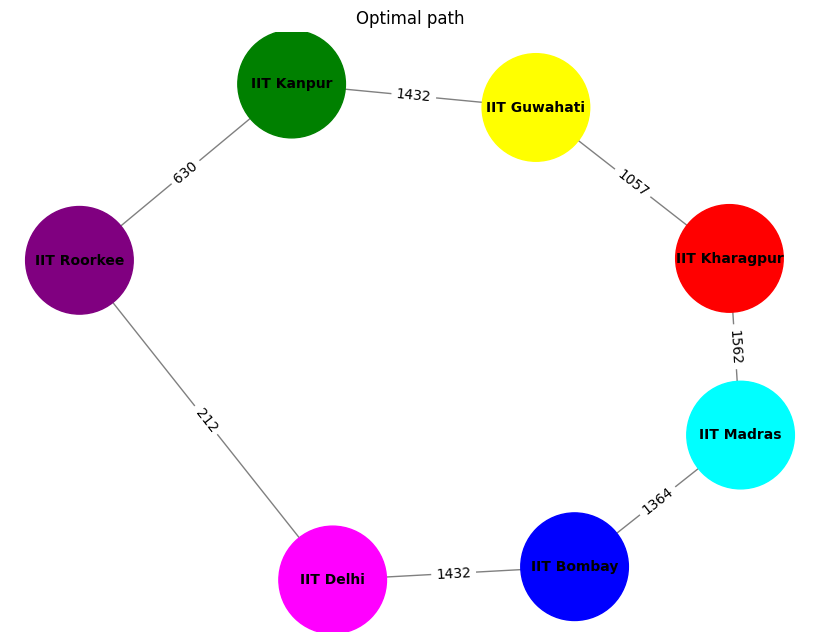

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from pyomo.environ import value

G = nx.Graph()

node_names = {0: 'IIT Bombay', 1: 'IIT Kanpur', 2: 'IIT Kharagpur', 3: 'IIT Madras', 4: 'IIT Delhi', 5: 'IIT Guwahati', 6: 'IIT Roorkee'}

# Define node colors
node_colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'purple']

for i in range(len(node_names)):
    G.add_node(node_names[i], color=node_colors[i])

for i in node_names:
    for j in node_names:
        if value(IIL_P_Model.x[i, j]) == 1:
            G.add_edge(node_names[i], node_names[j], weight=distance[i][j])

# Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)

# Draw nodes with colors
node_color_list = [G.nodes[node]['color'] for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_size=6000, node_color=node_color_list, font_size=10, font_weight='bold', edge_color='gray')

# Draw edge labels
edge_labels = {(u, v): str(G[u][v]['weight']) for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=10)

plt.title('Optimal path')
plt.show()
